# A graduating statistician at the Particle Physics Playground - Part I

## Introduction

This project isn't aimed to be prolific in terms of insight for research: the expertise with which I am going to approach it is still that of a graduating statistician to grips with her last undergraduate course in Mathematical Statistics, with some junior-level knowledge in Python for data science and little in High-Energy Physics and the underpinning analysis methods. Rather, this work is intended to be **my first independent exploratory data analysis** (with all the shortcomings of the case) and, as such, I expect to get some intuition about how the work of a data scientist is. 

First, a preliminary commonsensical question: how did I get here? Well, I am enthusiastically about to apply for the **CERN Summer Student Program** and, to **get some prior hands-on experience**, I decided to challenge myself and autonomously undertake an exploration of some CERN data. My search in the CERN Open Data Portal luckily led me to the **Particle Physics Playground website** (https://particle-physics-playground.github.io/): a beginner like me couldn't find something better than simplified data accompanied by tutorials, instructions, activities and insightul summaries of Relativistic Physics, all using Jupyter notebooks and Python code with which I am starting to become familiar! 

Since I opted to work locally, getting the data science environment and tools ready was quite a challenge, but the tutorial videos helped me step by step to get the thing done. I am not totally new to Physics: one of my previous university courses ("Mathematical Methods, Models and Modelling") gave some me background in Newtonian Mechanics. I am aware that this is not enough to thoroughly comprehend high-energy particles. However, the great resources available on the Portal introduced me to the fascinating world of Einstein's Relativity Theory and the amazing work done at the **CMS (Compact Muon Solenoid)** experiment at the LHC (Large Hadron Collider at CERN, Geneva, Switzerland) and at the **CLEO detector** at CESR (Cornell Electron Storage Ring, Cornell University, Ithaca, State of New York). Now, I am ready to start my first journey in the fascinating world of particles travelling at almost the speed of light!

## Organisation of the project

The project will develop by **carrying out the four activities** presented in the Particle Physics Playground website. The first two activities, Activity 00 and Activity 01, in some way less committed in terms of the code to be produced and amount of data to be loaded, are presented in Part I of the project, while Activity 02 and 03 are shown respectively in Parts II and III.
At the start of each activity, a short introduction will briefly describe what is going to be done therein. This is followed by the Python code necessary to carry out the analysis, accompanied by descriptive comments. Considerations about this data analysis experience will briefly be presented in the **Final thoughts** section in Part III.

## General strategy

As a first step, I shall import all the modules required for the analysis and specify the directory. Then, although the strategy outlined in the *codebkg00_DataInterfacing* Jupyter notebook (accessible at https://colab.research.google.com/drive/1wMs8ffF8KjQhulL90_fCCVIZT5Q4e9x5?usp=drive_open) suggests to work exclusively with lists, I prefer to convert the newly-computed lists into dataframes; this justifies my choice to import the Pandas module as well. Dataframe objects, in fact, allow to quickly manage NaN values and obtain summary statistics to help interpret plots.

As for how to organise the data, I shall adopt the first of the two approaches that are outlined in the *codebkg00_DataInterfacing* Jupyter notebook, using the **pps.get_collisions** (which picks up the whole bunch of data with one single call) rather than the **pps.get_collision** (which picks up one event, or the selected events, with each call). This seems a reasonable choice, given that I am going to work with entire datasets rather than specific (or a limited number of) events. The function usefully organises all the important information in a list, *collisions*, whose elements are dictionaries, each containing information about one single collision. In turn, the keys and values of these dictionaries are respectively the particles generated in the collision (like muons, pions, kaons and jets) and lists containing information about them, organised in further subdictionaries. Each piece of information is to be retrieved using a **for** loop structure to populate the lists for the particle features of interest.

It is noted that figures quoted from the data are reported to an accuracy of four decimal places.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pps_tools as pps
import pandas as pd
from os import chdir
path = 'C:\\Users\\ICON\\Desktop\\Python projects\\Particle Physics Playground\\playground-master\\data'
chdir(path)
%matplotlib notebook

C:\Users\ICON\anaconda3\lib\site-packages\h5hep-0.9-py3.8.egg\h5hep\write.py:423: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\ICON\anaconda3\lib\site-packages\h5hep-0.9-py3.8.egg\h5hep\write.py:423: SyntaxWarning: "is not" with a literal. Did you mean "!="?


## Activity 00: Identiying the mass of muons
(The relevant Jupyter notebook can be dowloaded from this link: https://drive.google.com/file/d/1dKh1axZSlNTBHDpyMF4GZPofSIdDeqR1/view)

The aim of this first introductory activity is to find the mass of the muons produced by proton-to-proton collisions in the context of the CMS experiment. This is to be done using the data about their energy and momentum in the $x$-, $y$- and $z$- directions and combining them with the formula
$$ m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)}. $$

The mass, energy and magnitude of momentum of the muons will then be explored visually so as to infer about their likely value in an informal, graphical way (a more rigorous and precise approach would require the choice of a probability model for the data, an estimator for the parameter of interest, a point estimate of it, confidence intervals and hypothesis testing). 

The data relate one thousand proton-to-proton collisions, which is certainly a tiny number compared to the forty-million collisions that occur each second at the Large Hadron Collider!

In [2]:
# The file containing the data is downloaded and the 'pps.get_collisions' function employed to get them organised in a dictionary-list structure, easier to retrieve information from.
pps.download_from_drive('dimuons_1000_collisions.hdf5')
infile = 'dimuons_1000_collisions.hdf5'
collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)
print(len(collisions), " collisions")  

# The first collision is printed so as to keep it structure for future coding reference.
print(collisions[0])


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0
1000  collisions
{'jets': [], 'muons': [{'e': 19.1712, 'px': 3.81713, 'py': 9.04323, 'pz': -16.4673, 'q': 1}, {'e': 5.43984, 'px': -0.362592, 'py': 2.62699, 'pz': -4.74849, 'q': 1}], 'electrons': [], 'photons': [], 'METx': 0.0, 'METy': 0.0}


### Creating the dataframe of energy and momentum in the $x$-, $y$- and $z$-directions of muons: muons_df

In [3]:
# Fist of all I shall create a new list, 'muons_list', containing all the muons produced in the collisions in 'collisions'.
muons_list = []
for collision in collisions:
    all_muons = collision['muons']
    for muon in all_muons:
        muons_list.append(muon)
        
print(len(muons_list))

2000


The analysis will involve a modest number of muons: the above code tells us that *muons_list* contains 2000 particles. 

In [4]:
# A list for each of the attributes of interest (energy and momentum in the x-, y- and z-directions) of the 2000 muons in 'muons_list' is now created.
muons_energy = []
muons_px = []
muons_py = []
muons_pz = []
for muon in muons_list:
    energy = muon['e']
    px = muon['px']
    py = muon['py']
    pz = muon['pz']
    muons_energy.append(energy)
    muons_px.append(px)
    muons_py.append(py)
    muons_pz.append(pz)

# A list of the names for the dataframe columns is created as well.
column_names = ['energy','px','py','pz']

# The dataframe 'muons_df' is finally constructed.
muons_df = pd.DataFrame(list(zip(muons_energy, muons_px, muons_py, muons_pz)), columns = column_names)
print(muons_df.head())

     energy        px       py        pz
0  19.17120  3.817130  9.04323 -16.46730
1   5.43984 -0.362592  2.62699  -4.74849
2  12.94350  5.125790 -3.98369 -11.19730
3  11.86360  4.789840 -6.26222  -8.86434
4  12.39990 -0.849742  9.40110   8.04015


Now that *muons_df* has been created, the quality of its data is assessed calling the **info**() method.

In [5]:
print(muons_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  2000 non-null   float64
 1   px      2000 non-null   float64
 2   py      2000 non-null   float64
 3   pz      2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB
None


Inspecting the information above, we can confirm that there are no columns with missing values and that the data types match the quantities in the columns. In fact, all columns contain measurements on continuous random variables (*energy*, *px*, *py* and *pz*) and this is mirrored by their data type being *float64*, appropriate for floating point numbers.  

### Calculating the magnitude of momentum of muons and their mass

With the code below, I shall compute the magnitude of momentum of muons and their mass as the new columns *magnitude of momentum* and *mass* of *muons_df*.

In [6]:
# Magnitude of momentum is calculated...
muons_df['magnitude of momentum'] = np.sqrt(muons_df['px']**2 + muons_df['py']**2 + muons_df['pz']**2)
# ... then mass!
muons_df['mass'] = np.sqrt(muons_df['energy']**2 - muons_df['magnitude of momentum']**2)
print(muons_df[['magnitude of momentum','mass']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   magnitude of momentum  2000 non-null   float64
 1   mass                   1996 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB
None


C:\Users\ICON\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


The output of the call to the **info**() method shows that four values are missing in the *mass* column. The warning message *invalid value encountered in sqrt* suggests that this is likely to be caused by the fact that, for these muons, the magnitude of their momentum is greater than their energy, thus generating a negative radicand while computing the mass. This hypothesis is to be verified below, so as to acknowledge the source of these NaNs.

In [7]:
# The indices of records with invalid masses are retrieved and the hypothesis of momentum magnitude greater than energy is tested.
invalid_masses_indices = muons_df[muons_df['mass'].isna()].index.values
invalid_masses_test = muons_df.iloc[invalid_masses_indices,4] > muons_df.iloc[invalid_masses_indices,0]
print(invalid_masses_test)

44      True
276     True
292     True
1096    True
dtype: bool


As expected!

### Visualising the mass of muons

The first histogram is that of muon masses but, before plotting it, I shall check the scale of the data using the **describe**() method to access the summary statistics of the *mass* column.

In [8]:
print(muons_df['mass'].describe())

count    1996.000000
mean        0.109766
std         0.165560
min         0.052402
25%         0.105320
50%         0.105653
75%         0.106039
max         7.484840
Name: mass, dtype: float64


We can see that the maximum mass, valued 7.4848 $GeV/c^2$, is definitely out of scale, especially when compared with the quartiles and the mean. This is the reason why the histogram plotted on the whole data range is not very informative and, also, why the mean (0.1098 $GeV/c^2$), being sensitive to outliers, is higher than the median (0.1057 $GeV/c^2$). Are there other unusually high masses or is this an isolated case? To answer this question, I will check whether there are masses above 0.2 $GeV/c^2$ (the value above which, after some visual exploration, observations turn out to be rare).

In [9]:
high_masses = muons_df[muons_df['mass']> 0.2]
print(high_masses['mass'])

636     7.484840
645     0.260672
1734    0.507155
Name: mass, dtype: float64


It is clear that there aren't unusually high masses other than the highest one: there are only other two observtions larger than 0.2 and both less are than 1 $GeV/c^2$.

Figure 1 below depicts the histogram of masses between 0.102 and 0.107 $GeV/c^2$ (prior visual exploration revealed that these are the best values for which the peak can be observed).

<IPython.core.display.Javascript object>


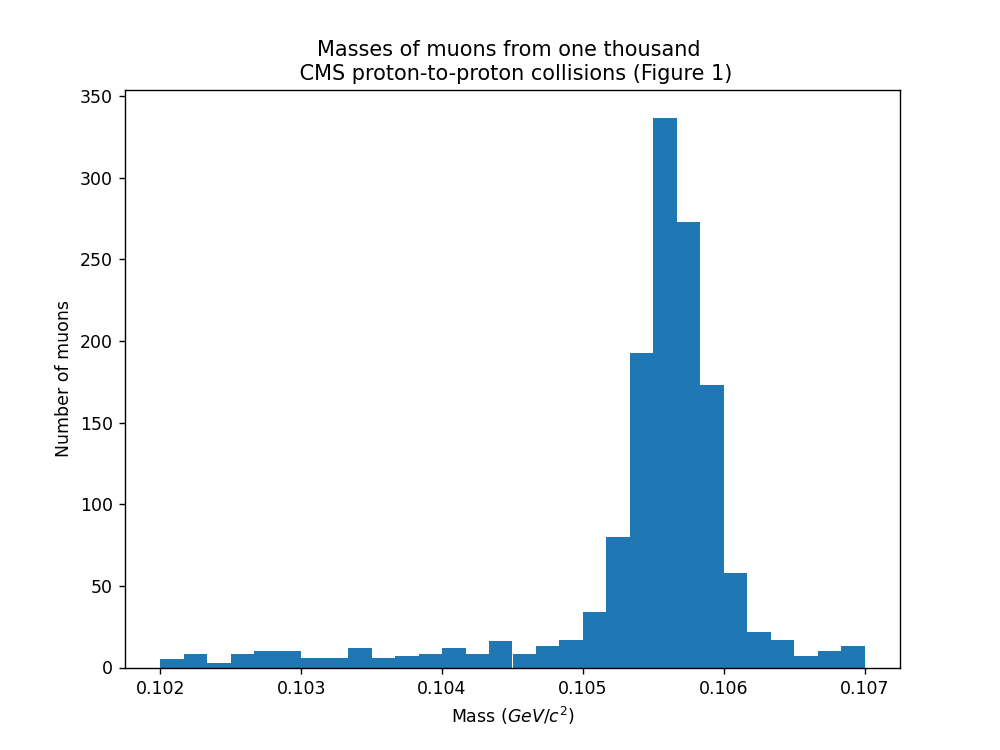

<function matplotlib.pyplot.show(block=None)>

In [10]:
fig,ax = plt.subplots()
ax.hist(muons_df['mass'].dropna(), range = (0.102,0.107), bins = 30)
ax.set_title('Masses of muons from one thousand \n CMS proton-to-proton collisions (Figure 1)')
ax.set_xlabel('Mass ($GeV/c^2$)')
ax.set_ylabel('Number of muons')
plt.show

The most appealing feature of the histogram is its unique mode at 0.1056 $GeV/c^2$, very close to the median value. This is a reassuring result given that the median (0.1057 $GeV/c^2$) corresponds, to 4 decimal places, to the actual estimate of the mass of muons (105.6584 $MeV/c^2$ to 4 decimal places, according to Wikipedia).

### Visualising the energy and magnitude of momentum of muons

The energy and magnitude of momentum of muons are to be visualised together. This is because, despite the different units of measurement ($GeV$ and $GeV/c$ respectively), their datasets appear to be practically identical in terms of their summary statistics, as we can notice from the output below. Let's not forget, also, the the speed of light $c$ is often set to 1 in Particle Physics formulae and, by doing so, their units of measurements coincide (for more on this and on magnitude of momentum being almost equivalent to energy read this informative CMS paper: https://www.i2u2.org/elab/cms/library/ref-mass-energy-momentum.jsp).

In [11]:
print(muons_df[['energy','magnitude of momentum']].describe())

            energy  magnitude of momentum
count  2000.000000            2000.000000
mean     14.939529              14.938812
std      76.444778              76.444661
min       2.607040               2.604903
25%       5.630335               5.629342
50%       8.915005               8.914380
75%      15.862625              15.862245
max    3384.429932            3384.421655


On the other hand, this similarity shouldn't surprise: as the equation 
$$E^2 = p^2 + m^2$$
indicates, when the particles undergo such a high acceleration that ther speed $v$ approaches $c$, the speed of light, the magnitude of their momentum, $p=\gamma mv$, increases due to the increase in $v$, becoming extremely large. This causes the invariant mass term, $m^2$, to become negligible and $E^2$ to be equal to $p^2$, hence $E = p$.

Looking again at the summary statistics we can observe that, right as happened for muon masses, the maximum values (3384.4299 $GeV$ for energy and 3384.4217 $GeV/c$ for magnitude of momentum) seem definitely out of range, causing the means (14.9395 $GeV$ and 14.9388 $GeV/c$ respectively) to be higher than the medians (8.9150 $GeV$ and 8.9144 $GeV/c$ respectively). Since masses were calculated using these figures, I expect the same scenario to occur here and these to be the only outliers in the dataset. Let's confirm that by checking if there are other observations higher than 200 (the value under which observations turn out to be clustered).

In [12]:
high_energy = muons_df[muons_df['energy'] > 200]
high_momentum = muons_df[muons_df['magnitude of momentum'] > 200]
print(high_energy['energy'])
print(high_momentum['magnitude of momentum'])

636    3384.429932
Name: energy, dtype: float64
636    3384.421655
Name: magnitude of momentum, dtype: float64


The output above confirms that the maximum energy and magnitude of momentum are the only high outliers. Moreover, they correspond to observation 636, the same with the unusually high mass! 

A histogram showing energy and magnitude of momentum plotted against the same pair of axes is shown in Figure 2 below. Although the choice of superimposed histograms may not look orthodox due to the different units of measurement, this layout is motivated by the will of highlighting how the two quantities become essentially equivalent in this context. The range over which the data is plotted, and where the peak in the data is more visible, is comprised between 0 and 40 units $GeV$ and $GeV/c$ respectively.

<IPython.core.display.Javascript object>


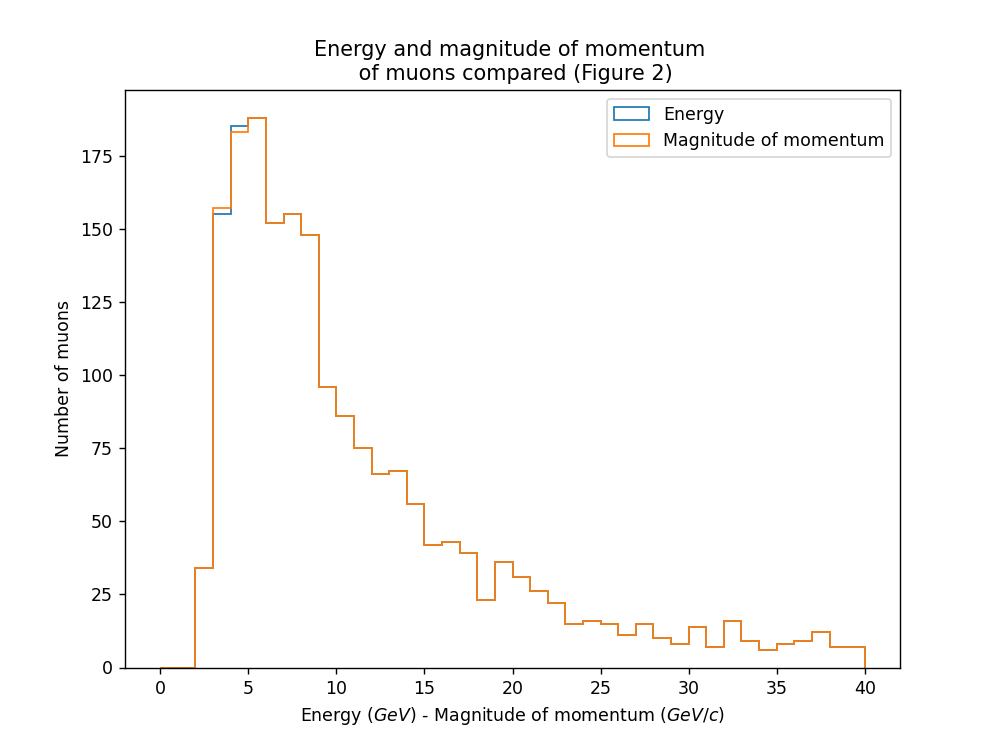

<function matplotlib.pyplot.show(block=None)>

In [13]:
fig,ax = plt.subplots()
ax.hist(muons_df['energy'],range=(0,40), bins=40, histtype = 'step', label = 'Energy')
ax.hist(muons_df['magnitude of momentum'],range=(0,40), bins=40, histtype = 'step', label = 'Magnitude of momentum')
ax.set_title('Energy and magnitude of momentum \n of muons compared (Figure 2)')
ax.set_xlabel('Energy ($GeV$) - Magnitude of momentum ($GeV/c$)')
ax.set_ylabel('Number of muons')
ax.legend()
plt.show

Arguably, the most impressive feature of the plot is the striking similarity between the energy and magnitude of momentum datasets (as anticipated): the two step histograms overlap almost everywhere. There is one single peak at about 5 $GeV$ and $GeV/c$ respectively. The shape of the peak itself is different from that of the peak observed in the histogram of masses: while the latter is overall symmetric descending as steeply as it rose, the former descends more softly, indicating a more marked right-skewness. This explains why, in this case, the mode and the median are not close to each other, differently to what happened with the distribution of masses.  

Figure 3, with boxplots of the distributions of energy and magnitude of momentum compared with a boxplot of the distribution of masses, will help confirm this overall impression.

<IPython.core.display.Javascript object>


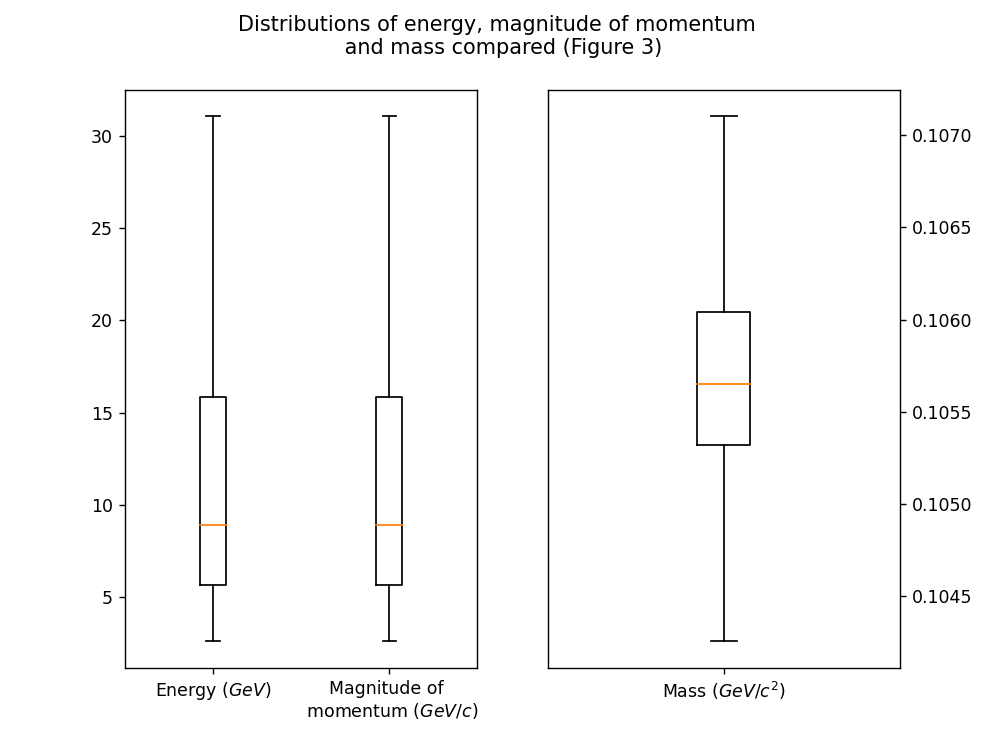

<function matplotlib.pyplot.show(block=None)>

In [14]:
fig,ax = plt.subplots(1,2)
fig.suptitle('Distributions of energy, magnitude of momentum \n and mass compared (Figure 3)', fontsize=12)
ax[0].boxplot([muons_df['energy'], muons_df['magnitude of momentum']], showfliers = False)
ax[0].set_xticklabels(['Energy ($GeV$)','Magnitude of \n momentum ($GeV/c$)'])
ax[1].boxplot(muons_df['mass'].dropna(), showfliers = False)
ax[1].set_xticklabels(['Mass ($GeV/c^2$)'])
ax[1].yaxis.set_ticks_position('right')
plt.show

The impression of difference in the distributions is confirmed: the boxplot of the distribution of masses is definitely symmetric compare to those for energy and magnitude of momentum!

### Calculating the mass of muons using Classical Physics 

This time, the mass of muons is calculated using the formula provided by Classical Physics:  
$$ m = \frac{p^2}{2KE},$$
where the kinetic energy, $KE$, is taken to be the energy of muons in our dataset. The aim of the activity is appreciating  how the figures we obtain by this way are neatly different from those obtained within the Relativistic Kinematics framework, due to the different features of massive objects (to which the aforementioned formula applies) and particles travelling at relativistic velocities (see https://courses.lumenlearning.com/physics/chapter/28-6-relativistic-energy/ for insight about energy in the relativistic and classical frameworks).

In [15]:
# The mass of muons according to the Classical Physics framework is computed and added as a new column, 'classical mass', to the 'muons_df' dataframe.
muons_df['classical mass'] = muons_df['magnitude of momentum']**2 / (2*muons_df['energy'])
print(muons_df[['mass','classical mass']].describe())

              mass  classical mass
count  1996.000000     2000.000000
mean      0.109766        7.469048
std       0.165560       38.222272
min       0.052402        1.301383
25%       0.105320        2.814174
50%       0.105653        4.456877
75%       0.106039        7.930933
max       7.484840     1692.206689


The huge difference between the results produced by the two different formulae is already clear by looking at the summary statistics of the *mass* and *classical mass* columns! But where is the peak of *classical mass*? Let's view Figure 4 to know!

<IPython.core.display.Javascript object>


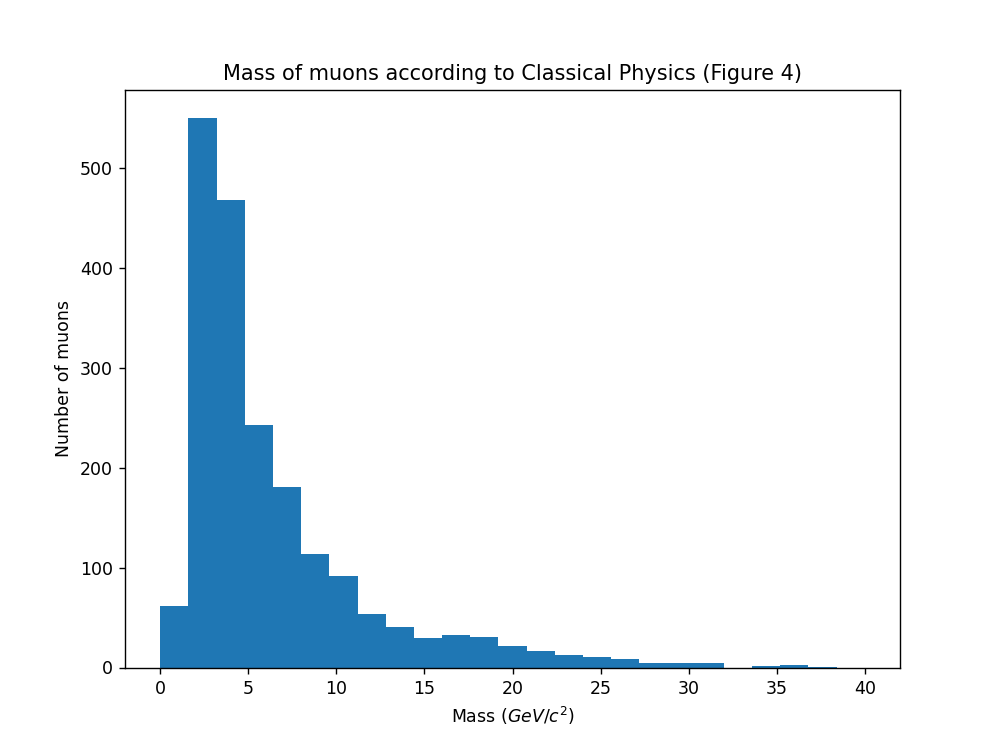

<function matplotlib.pyplot.show(block=None)>

In [16]:
fig,ax = plt.subplots()
ax.hist(muons_df['classical mass'],range=(0,40),bins=25)
ax.set_title('Mass of muons according to Classical Physics (Figure 4)')
ax.set_xlabel('Mass ($GeV/c^2$)')
ax.set_ylabel('Number of muons')
plt.show

The peak here is at about 3 $GeV/c^2$, a rather different value from that of the histogram of the masses plotted using the formula provided by Relativistic Kinematics, more than 28 times as high as the actual mass of a muon!

## Activity 01: Reconstructing parent particles that generated dimuons
(The relevant Jupyter notebook can be dowloaded from this link: https://drive.google.com/file/d/1HpKTTnQ0i7tEIm1rrMSvnW6uLOjjuApu/view)

This second activity, differently from the first, is not focused on the exploration of particle properties, rather, on particle reconstruction. Each of the 100 000 proton-to-proton collisions in this analysis generated particles which in turn decayed into dimuons, and my challenge here is to identify these parent particles from their mass.

Parent particle masses can most of times be recognised by peaks in the histogram of masses. Masses are to computed using the usual Relativistic Kinematics formula, 
$$ m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)}, $$
while energy and momentum in the $x$-, $y$- and $z$-directions are in turn calculated as the sum of the energy and momentum in the $x$-, $y$- and $z$-directions of the respective daughter particles, that is,
$$ E_{parent} = E_{muon_{1}} + E_{muon_{2}}, $$
$$ {p_x}_{parent} = {p_x}_{muon_{1}} + {p_x}_{muon_{2}}, $$
$$ {p_y}_{parent} = {p_y}_{muon_{1}} + {p_y}_{muon_{2}}, $$
$$ {p_z}_{parent} = {p_z}_{muon_{1}} + {p_z}_{muon_{2}}. $$


In [17]:
# Getting started with the data file...
pps.download_from_drive('dimuons_100k.hdf5')
infile = 'data/dimuons_100k.hdf5'
collisions_large = pps.get_collisions(infile,experiment='CMS',verbose=False)
print(len(collisions_large), " collisions")  
print(collisions_large[0])


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0
Reading in event  10000
Reading in event  20000
Reading in event  30000
Reading in event  40000
Reading in event  50000
Reading in event  60000
Reading in event  70000
Reading in event  80000
Reading in event  90000
100000  collisions
{'jets': [], 'muons': [{'e': 19.1712, 'px': 3.81713, 'py': 9.04323, 'pz': -16.4673, 'q': 1}, {'e': 5.43984, 'px': -0.362592, 'py': 2.62699, 'pz': -4.74849, 'q': 1}], 'electrons': [], 'photons': [], 'METx': 0.0, 'METy': 0.0}


### Creating dataframes of masses: positive_dimuons_df, negative_dimuons_df and opposite_dimuons_df

The first issue I shall verify before starting the reconstruction process is the number of muons produced in each collision. This is because all possible pairs of muons within each collision are to be formed and knowing in advance how many muons were generated is important to identify the best coding strategy to form these pairs.

In [18]:
print(set([len(collision['muons']) for collision in collisions_large]))

{2}


The code above shows that all the one-hundred thousand collisions generated two muons: there were no collisions with more than two muons produced. Therefore, for each collision, only one combination of muons is possible and no other coding strategies are required other than ordinary data extraction with **for** loops to populate lists. The energy and three momenta of the muons in each pair are now extracted and used to calculate the energy, magnitude of momentum and mass of the parent particles. Pairs of positively, negatively and oppositely charge muons are to be differentiated and a dataframe for the masses of the resulting parent particles is to be built in each case.

In [19]:
# The relevant data are extracted and the energy and momenta of the parent particles calculated.
energy_parent_positive_charge = []
magnitude_momentum_parent_positive_charge = []
mass_parent_positive_charge = []

energy_parent_negative_charge = []
magnitude_momentum_parent_negative_charge = []
mass_parent_negative_charge = []

energy_parent_opposite_charge = []
magnitude_momentum_parent_opposite_charge = []
mass_parent_opposite_charge = []

for collision in collisions_large:
    charge_first_muon = collision['muons'][0]['q']
    charge_second_muon = collision['muons'][1]['q']
    energy_first_muon = collision['muons'][0]['e']
    energy_second_muon = collision['muons'][1]['e']
    px_first_muon = collision['muons'][0]['px']
    px_second_muon = collision['muons'][1]['px']
    py_first_muon = collision['muons'][0]['py']
    py_second_muon = collision['muons'][1]['py']
    pz_first_muon = collision['muons'][0]['pz']
    pz_second_muon = collision['muons'][1]['pz']
    energy_parent = energy_first_muon + energy_second_muon
    magnitude_momentum_parent = np.sqrt((px_first_muon + px_second_muon)**2 + (py_first_muon + py_second_muon)**2 
                                        + (pz_first_muon + pz_second_muon)**2)
    mass_parent = np.sqrt(energy_parent**2 - magnitude_momentum_parent**2)
    if (charge_first_muon == 1 and charge_second_muon == 1): 
        energy_parent_positive_charge.append(energy_parent)
        magnitude_momentum_parent_positive_charge.append(magnitude_momentum_parent)
        mass_parent_positive_charge.append(mass_parent)
    elif (charge_first_muon == -1 and charge_second_muon == -1):
        energy_parent_negative_charge.append(energy_parent)
        magnitude_momentum_parent_negative_charge.append(magnitude_momentum_parent)
        mass_parent_negative_charge.append(mass_parent)
    else: 
        energy_parent_opposite_charge.append(energy_parent)                                   
        magnitude_momentum_parent_opposite_charge.append(magnitude_momentum_parent)
        mass_parent_opposite_charge.append(mass_parent)

# The dataframes are now constructed and the summary statistics for the masses of the parent particles obtained.
positive_dimuons_df = pd.DataFrame(list(mass_parent_positive_charge), columns = ['mass +'])
print(positive_dimuons_df.info())
negative_dimuons_df = pd.DataFrame(list(mass_parent_negative_charge), columns = ['mass -'])
print(negative_dimuons_df.info())
opposite_dimuons_df = pd.DataFrame(list(mass_parent_opposite_charge), columns = ['mass +-'])
print(opposite_dimuons_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18544 entries, 0 to 18543
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mass +  18544 non-null  float64
dtypes: float64(1)
memory usage: 145.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17510 entries, 0 to 17509
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mass -  17510 non-null  float64
dtypes: float64(1)
memory usage: 136.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63946 entries, 0 to 63945
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mass +-  63946 non-null  float64
dtypes: float64(1)
memory usage: 499.7 KB
None


Reassuringly, the above output indicates that there are no missing values in the three dataframes: this time, there are no parent particles whose magnitude of momentum is higher than energy. It is also interesting to note in which percentages the differently charged pairs of muons were produced: 18.54% for pairs of positively charged muons, 17.51% for pairs of negatively charged muons and 63.95% for pairs of oppositely charged muons.

### Plotting the mass of parent particles differentiating the charge type of the muon pairs

Histograms of the parent particles are now to be plotted. Superimposed step histograms are once more the chosen layout, in order to better compare the shape of the distributions arising from differently charged muon pairs. But, before this, let's inspect the summary statistics of the masses of parent particles in the three cases.

In [20]:
print(positive_dimuons_df.describe())
print(negative_dimuons_df.describe())
print(opposite_dimuons_df.describe())

             mass +
count  18544.000000
mean      10.357118
std        8.445595
min        1.998746
25%        3.529331
50%        8.513575
75%       14.049454
max       96.809448
             mass -
count  17510.000000
mean      10.275114
std        8.148170
min        1.957823
25%        3.593477
50%        8.577574
75%       14.040871
max      107.886874
            mass +-
count  63946.000000
mean       9.965283
std       10.815577
min        1.998629
25%        3.114142
50%        7.398313
75%       12.607757
max      109.977125


Overall, there are not important differences in summary statistics, with the masses of parent particles ranging from about 2 $GeV/c^2$ up to almost 110 $GeV/c^2$. In all cases the mean mass, located at about 10 $GeV/c^2$, is larger than the median (between 7 and 8 $GeV/c^2$), revealing an influence due to high observations (the maximum values are pretty out of range) and possible right-skewness.

However, these figures don't highlight the feature that matters the most in this analysis, that is, peaks in mass frequencies. These can be highlighted only by visual plots. The histograms shown below are the result of different exploration attempts and show the three distinct peaks I identified. 

#### The first peak: a clue of $J/\Psi$ mesons

Figure 5 shows that the first peak worth of mention occurs at about 3.1 $GeV/c^2$ and is a hint of $J/\Psi$ mesons, whose mean rest mass is 3.0969 $GeV/c^2$ (according to Wikipedia).

<IPython.core.display.Javascript object>


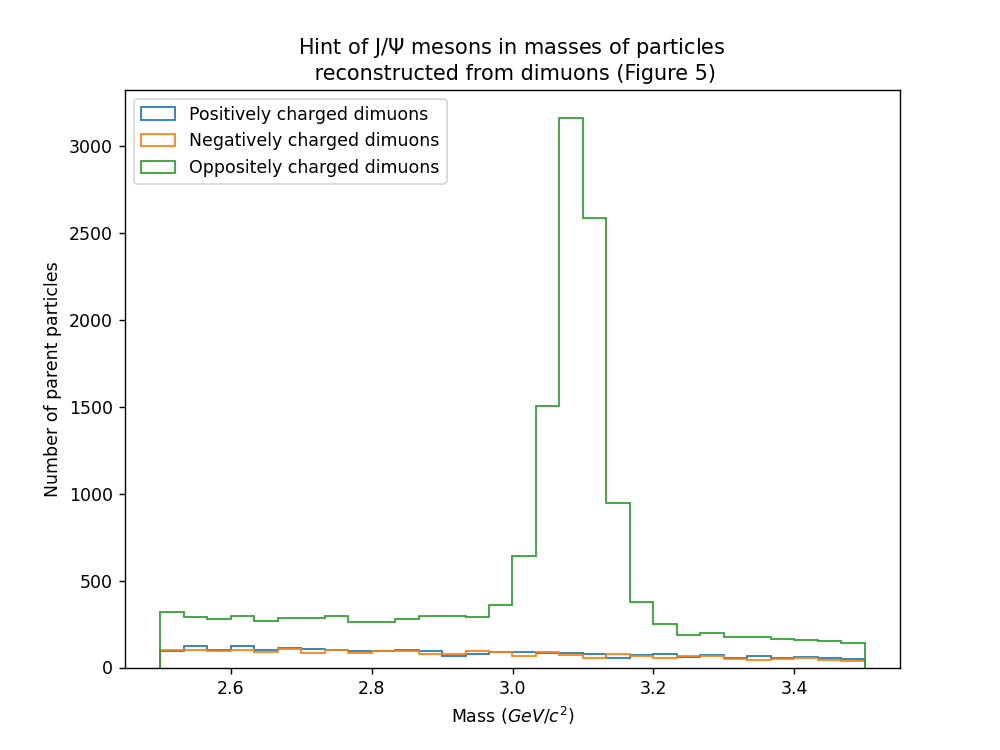

<function matplotlib.pyplot.show(block=None)>

In [21]:
fig,ax = plt.subplots()
ax.hist(positive_dimuons_df['mass +'], range = (2.5,3.5), histtype = 'step', label = 'Positively charged dimuons', bins = 30)
ax.hist(negative_dimuons_df['mass -'], range = (2.5,3.5), histtype = 'step', label = 'Negatively charged dimuons', bins = 30)
ax.hist(opposite_dimuons_df['mass +-'], range = (2.5,3.5), histtype = 'step', label = 'Oppositely charged dimuons', bins = 30)
ax.set_title('Hint of J/$\Psi$ mesons in masses of particles \n reconstructed from dimuons (Figure 5)')
ax.set_xlabel('Mass ($GeV/c^2$)')
ax.set_ylabel('Number of parent particles')
ax.legend(loc = 'upper left')
plt.show

The interesting feature of the histogram (which will be common also to the histograms depicting the other two peaks) is that the peak is determind by masses of parent particles reconstructed from oppositely charged dimuons. Positive and negative dimuons don't appear to have given rise to particles whose masses are clustered in peaks.


#### The second peak: a clue of $\Upsilon$ mesons

Figure 6 shows that the second peak worth of mention occurs at about 9.4 $GeV/c^2$ and is a hint of $\Upsilon$ mesons, whose mean rest mass is 9.4603 $GeV/c^2$ (according to Wikipedia).

<IPython.core.display.Javascript object>


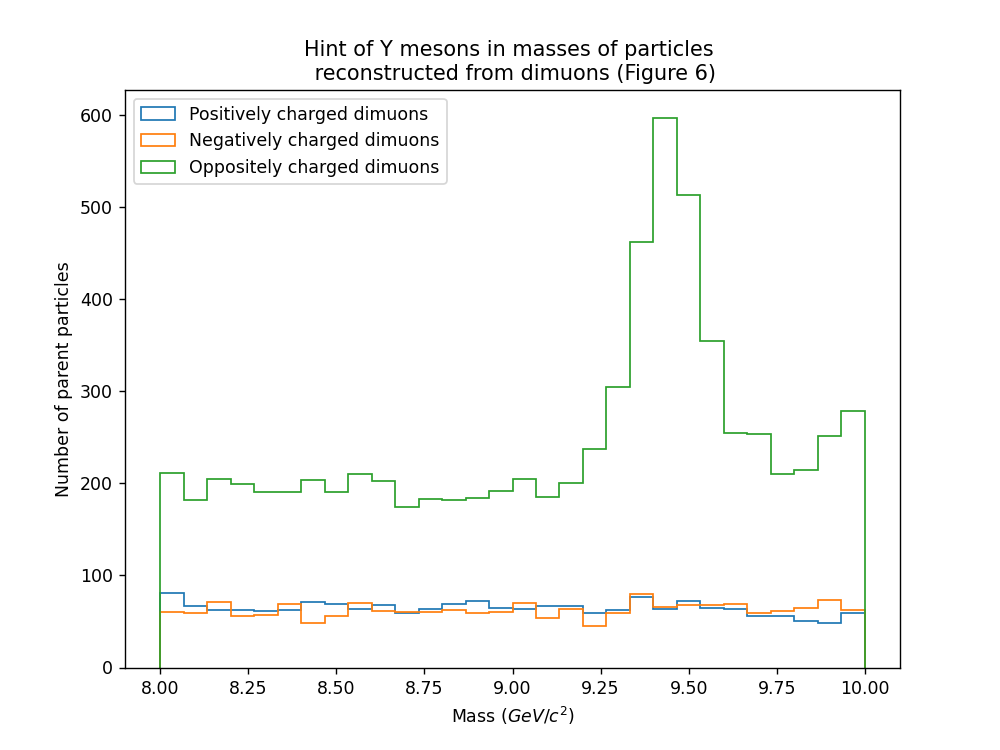

<function matplotlib.pyplot.show(block=None)>

In [22]:
fig,ax = plt.subplots()
ax.hist(positive_dimuons_df['mass +'], range = (8,10), histtype = 'step', label = 'Positively charged dimuons', bins = 30)
ax.hist(negative_dimuons_df['mass -'], range = (8,10), histtype = 'step', label = 'Negatively charged dimuons', bins = 30)
ax.hist(opposite_dimuons_df['mass +-'], range = (8,10), histtype = 'step', label = 'Oppositely charged dimuons', bins = 30)
ax.set_title('Hint of Y mesons in masses of particles \n reconstructed from dimuons (Figure 6)')
ax.set_xlabel('Mass ($GeV/c^2$)')
ax.set_ylabel('Number of parent particles')
ax.legend(loc = 'upper left')
plt.show

#### The third peak: a clue of $Z$ bosons

Figure 7 shows that the third peak is located at about 91 $GeV/c^2$ and, although it is not particularly high (it barely reaches 40 units compared to more than 3000 units of the peak for $J/\Psi$ and 600 units of the peak for $\Upsilon$ mesons), it certainly deserves mentioning, because it suggests that some of the dimuons were generated by $Z$ bosons. These particles, in fact, have a mean rest mass of 91.1876 $GeV/c^2$ (according to Wikipedia).

<IPython.core.display.Javascript object>


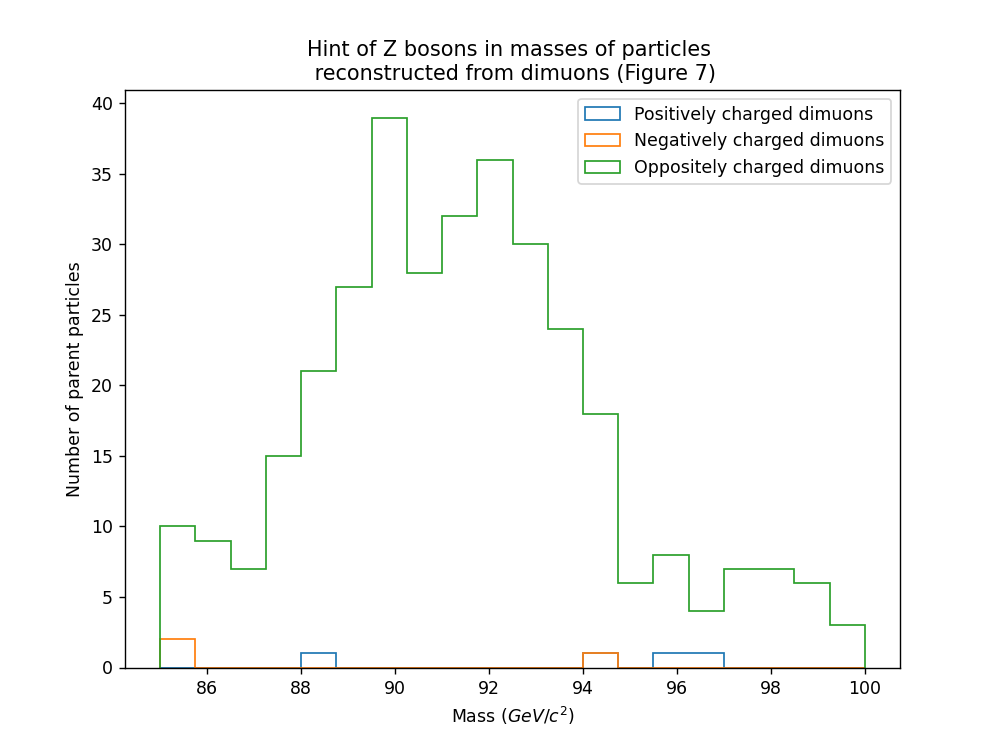

<function matplotlib.pyplot.show(block=None)>

In [23]:
fig,ax = plt.subplots()
ax.hist(positive_dimuons_df['mass +'], range = (85,100), histtype = 'step', label = 'Positively charged dimuons', bins = 20)
ax.hist(negative_dimuons_df['mass -'], range = (85,100), histtype = 'step', label = 'Negatively charged dimuons', bins = 20)
ax.hist(opposite_dimuons_df['mass +-'], range = (85,100), histtype = 'step', label = 'Oppositely charged dimuons', bins = 20)
ax.set_title('Hint of Z bosons in masses of particles \n reconstructed from dimuons (Figure 7)')
ax.set_xlabel('Mass ($GeV/c^2$)')
ax.set_ylabel('Number of parent particles')
ax.legend(loc = 'upper right')
plt.show

Concluding, the three histograms suggest that the three parent particles previously identified ($J/\Psi$ mesons, $\Upsilon$ mesons and $Z$ bosons) gave rise mainly to pairs of muons with opposite charge: there is no peak in the blue and yellow histograms, for positively and negatively charged dimuons respectively. This visual exploration provides therefore some indication that the aforementioned parent particles don't tend to decay into pair of positively and negatively charged dimuons, rather into oppositely charged dimuons.